<a href="https://colab.research.google.com/github/adityajain2407/DAV-1-Feb23-Tue/blob/main/12_feb23_data_viz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2023-07-22 01:40:30--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.153.13, 13.35.153.227, 13.35.153.45, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.153.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  2.81MB/s    in 0.7s    

2023-07-22 01:40:32 (2.81 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [22]:
top3_pub = data['Publisher'].value_counts()
print(top3_pub)

Electronic Arts                 1351
Activision                      1014
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
TYO                                1
Commseed                           1
Fortyfive                          1
Xing Entertainment                 1
MediaQuest                         1
Name: Publisher, Length: 578, dtype: int64


In [4]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]

top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257


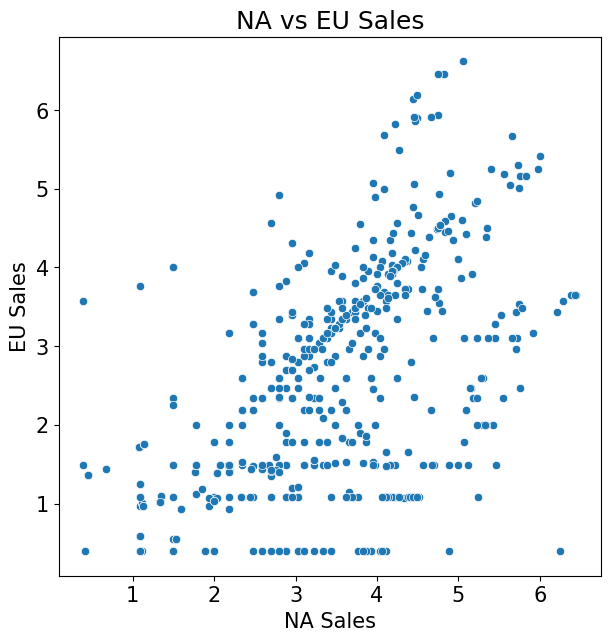

In [6]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = "NA_Sales", y = "EU_Sales", data = top3_data)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("NA Sales", fontsize = 15)
plt.ylabel("EU Sales", fontsize = 15)
plt.title("NA vs EU Sales", fontsize = 18)
plt.show()

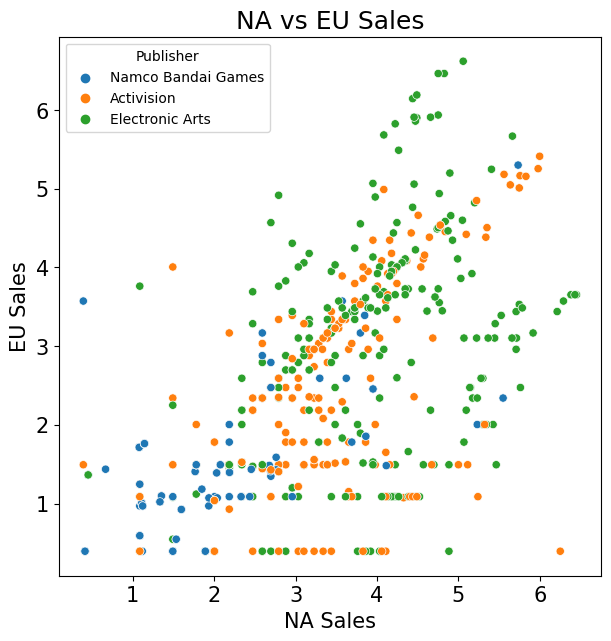

In [7]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = "NA_Sales", y = "EU_Sales", hue="Publisher" ,data = top3_data)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("NA Sales", fontsize = 15)
plt.ylabel("EU Sales", fontsize = 15)
plt.title("NA vs EU Sales", fontsize = 18)
plt.show()
#NNC

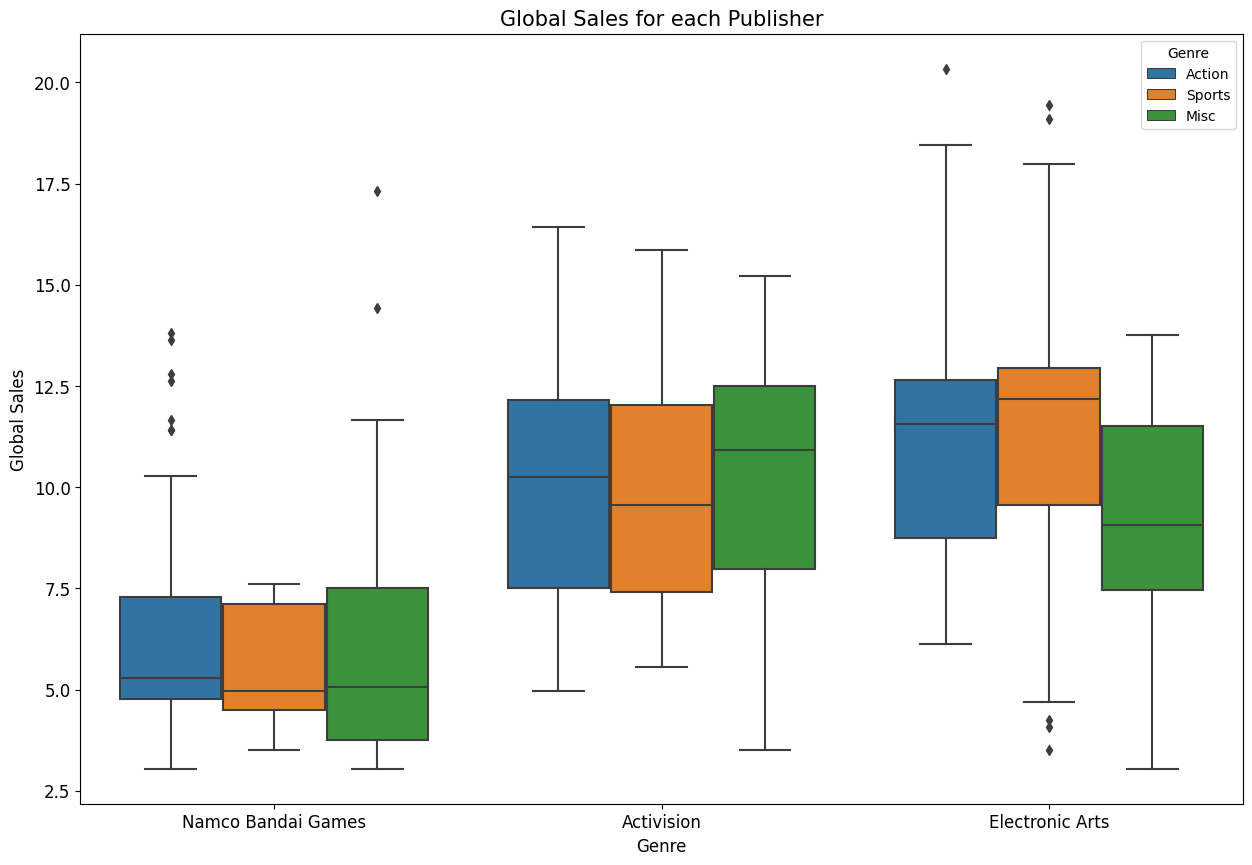

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Publisher',y='Global_Sales',hue='Genre',data=top3_data)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Global Sales for each Publisher', fontsize=15)
plt.show()

#CCN

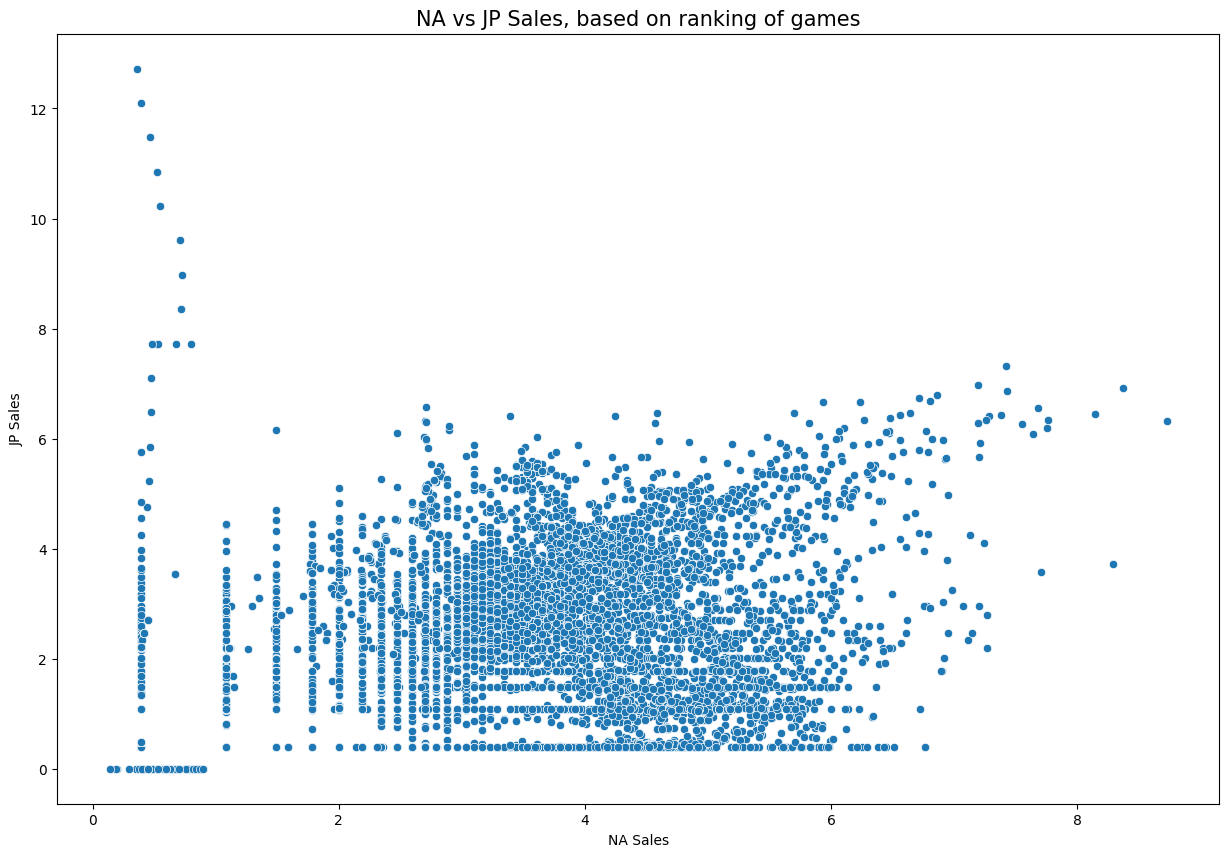

In [9]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data['NA_Sales'], y=data['JP_Sales'], data=top3_data)
plt.xlabel('NA Sales',fontsize=10)
plt.ylabel('JP Sales', fontsize=10)
plt.title('NA vs JP Sales, based on ranking of games', fontsize=15)
plt.show()

#NN

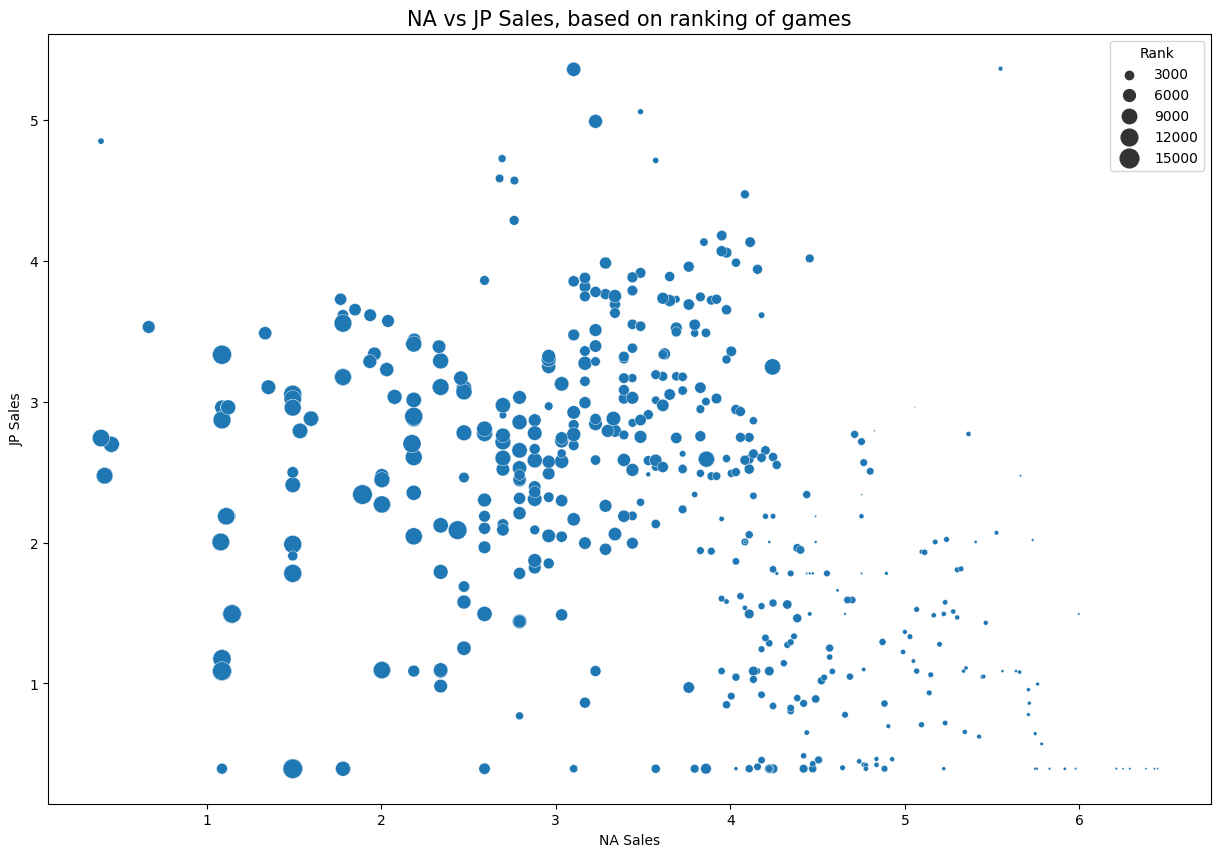

In [10]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data['NA_Sales'], y=data['JP_Sales'], size = "Rank", sizes = (1,200), data=top3_data)
plt.xlabel('NA Sales',fontsize=10)
plt.ylabel('JP Sales', fontsize=10)
plt.title('NA vs JP Sales, based on ranking of games', fontsize=15)
plt.show()

#NNN

#HW - try to read what exactly sizes = (1,200) is helping you with

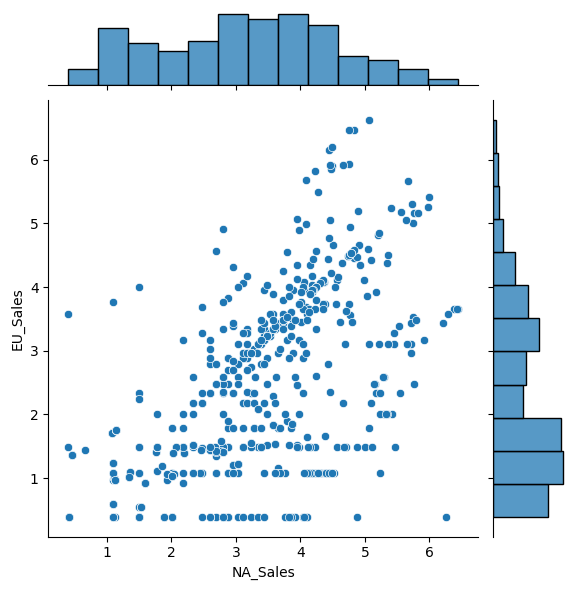

In [11]:
sns.jointplot(x = "NA_Sales", y = "EU_Sales", data = top3_data)
plt.show()

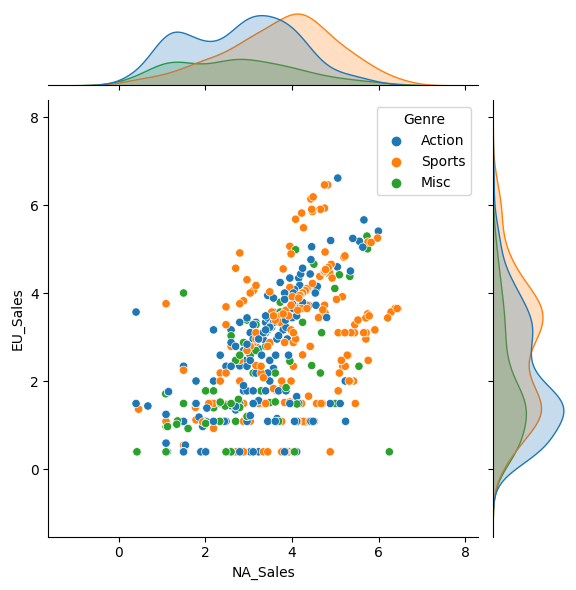

In [12]:
sns.jointplot(x = "NA_Sales", y = "EU_Sales", data = top3_data, hue = "Genre")
plt.show()

#Revisit this after done with Statistics clcasses

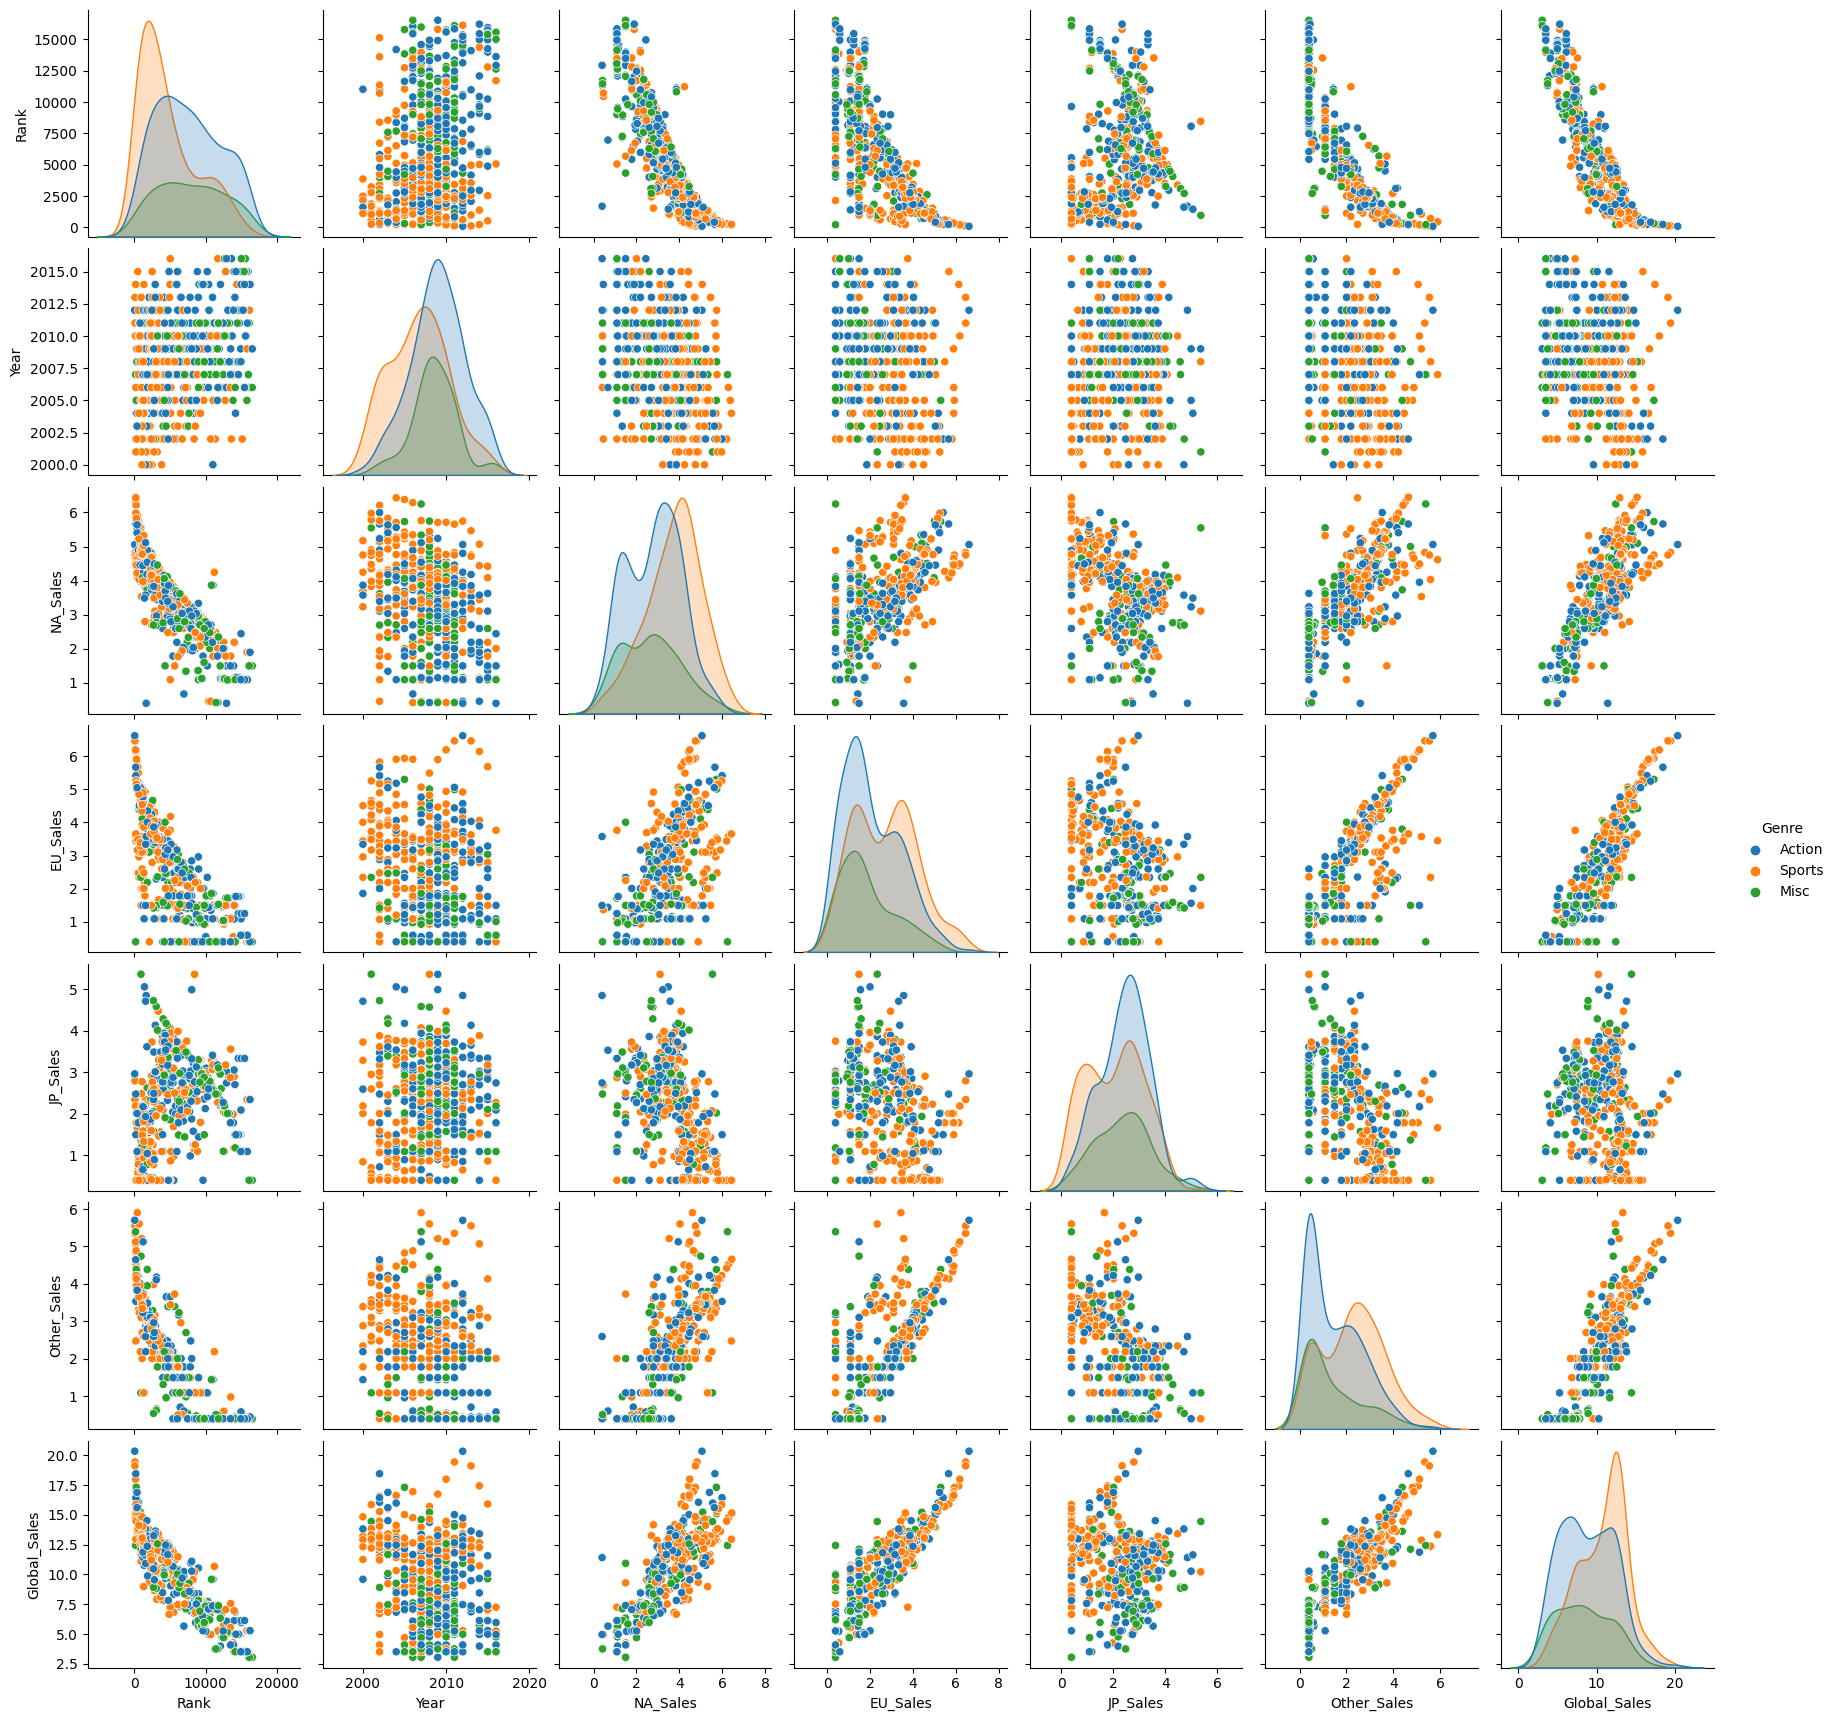

In [14]:
sns.pairplot(data = top3_data, hue = "Genre")

In [15]:
#correlation
'''
Correlation: -1 to 1
corr(a,b) --> 1
corr(a,b) --> -1
coorr(a,b) --> 0
'''

# corr(a,a) -> +1



In [16]:
top3_data.corr() #correlation matrix

<ipython-input-16-c78d7a78d920>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top3_data.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


<ipython-input-17-4ebbdee39bcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top3_data.corr())


<Axes: >

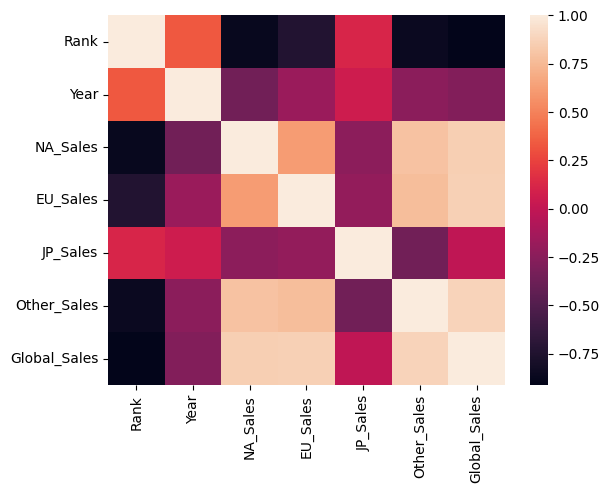

In [17]:
sns.heatmap(top3_data.corr())

<ipython-input-18-447183d951f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top3_data.corr(), annot = True)


<Axes: >

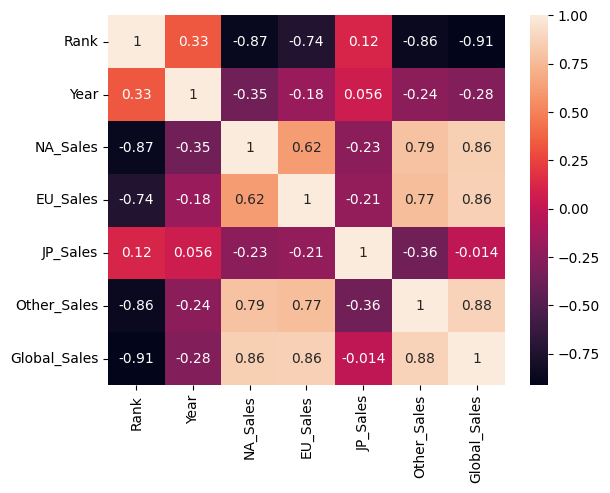

In [18]:
sns.heatmap(top3_data.corr(), annot = True)

<ipython-input-19-2a95a8afb661>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top3_data.corr(), annot = True, cmap = "Blues")


<Axes: >

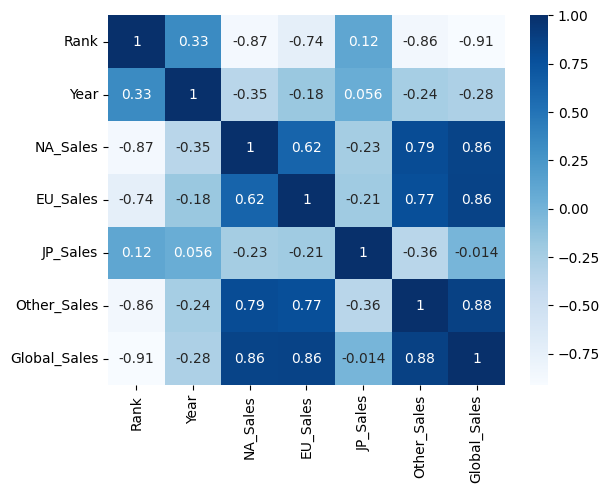

In [19]:
sns.heatmap(top3_data.corr(), annot = True, cmap = "Blues")

In [20]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [ ]:
#Over the weekend:
'''
1. Watch all the pending lectures
2. Solve all the pending assignments
3. Solve the HW questsions
4. Note down your doubts --> conceptual + assing --> Tue
'''